In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\mirth_gd7dvu\\Downloads\\archive\\sales.csv"
data = pd.read_csv(file_path)

# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Output the results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['branch', 'city', 'customer_type', 'gender', 'product_name', 'product_category']
Numerical Columns: ['sale_id', 'unit_price', 'quantity', 'tax', 'total_price', 'reward_points']


In [2]:
print(data.head())
print(data.info())

   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50         7  1.72        26.22              2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values based on the context
data = data.fillna(method='ffill')  # Example: forward fill
# Alternatively, drop rows with missing values
# data = data.dropna()


sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64


In [4]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Drop duplicates
data = data.drop_duplicates()


Number of duplicate rows: 0


In [5]:
print(data.describe(include='all'))


            sale_id branch      city customer_type gender product_name  \
count   1000.000000   1000      1000          1000   1000         1000   
unique          NaN      2         3             2      2            5   
top             NaN      A  New York        Member   Male      Shampoo   
freq            NaN    674       344           516    528          224   
mean     500.500000    NaN       NaN           NaN    NaN          NaN   
std      288.819436    NaN       NaN           NaN    NaN          NaN   
min        1.000000    NaN       NaN           NaN    NaN          NaN   
25%      250.750000    NaN       NaN           NaN    NaN          NaN   
50%      500.500000    NaN       NaN           NaN    NaN          NaN   
75%      750.250000    NaN       NaN           NaN    NaN          NaN   
max     1000.000000    NaN       NaN           NaN    NaN          NaN   

       product_category   unit_price     quantity          tax  total_price  \
count              1000  1000.00

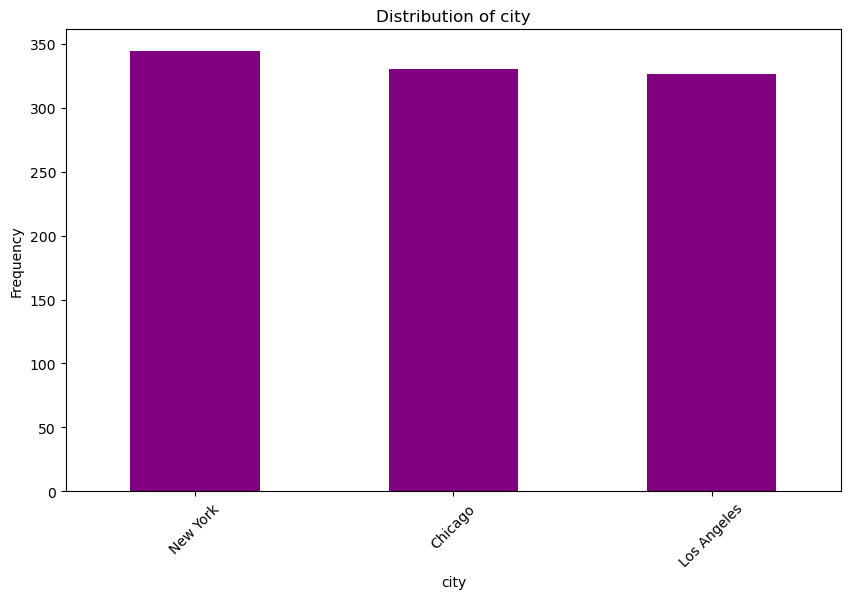

In [10]:
import matplotlib.pyplot as plt

# Replace with a column name from the categorical columns in your dataset
categorical_column = 'city'  # You can choose from: 'branch', 'city', 'customer_type', 'gender', 'product_name', 'product_category'

# Plot the distribution of the chosen categorical column
data[categorical_column].value_counts().plot(kind='bar', figsize=(10, 6),color="purple")

# Customize the plot
plt.title(f'Distribution of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


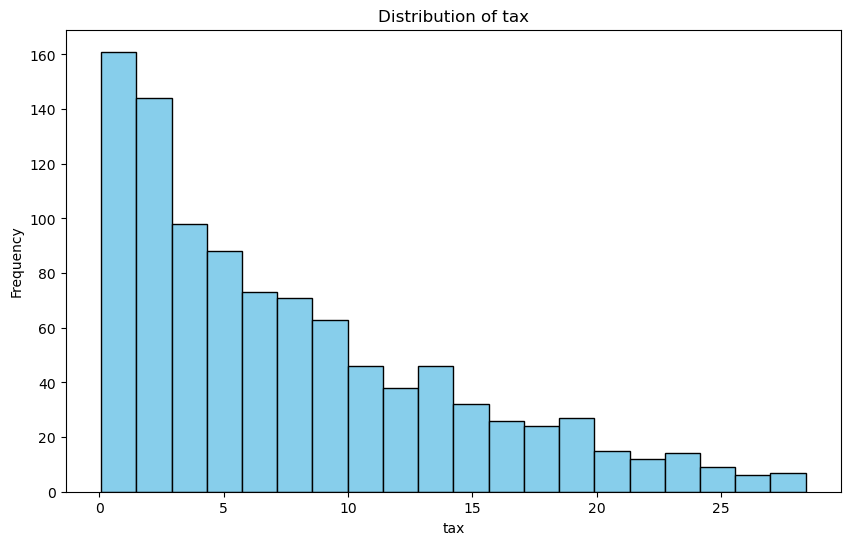

In [12]:
continuous_column = 'tax'  # Replace with a column name from your dataset
data[continuous_column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title(f'Distribution of {continuous_column}')
plt.xlabel(continuous_column)
plt.ylabel('Frequency')
plt.show()


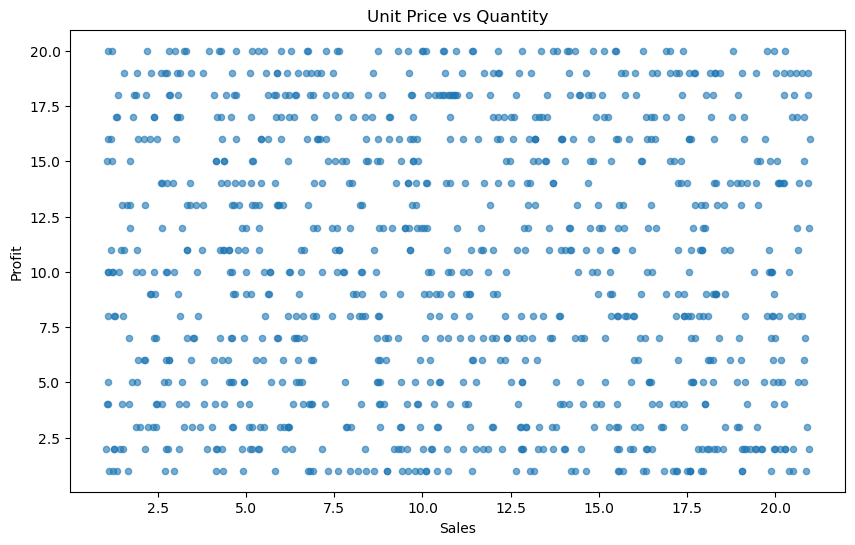

In [14]:
data.plot.scatter(x='unit_price', y='quantity', alpha=0.6, figsize=(10, 6))
plt.title('Unit Price vs Quantity')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


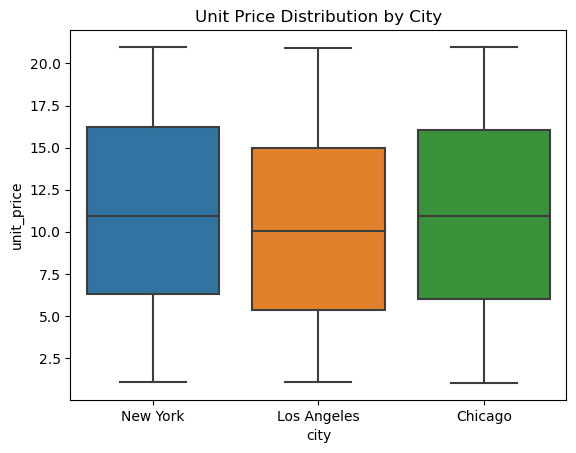

In [15]:
import seaborn as sns

sns.boxplot(x='city', y='unit_price', data=data)
plt.title('Unit Price Distribution by City')
plt.show()


C:\Users\mirth_gd7dvu\AppData\Local\Temp\ipykernel_18572\2128186513.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


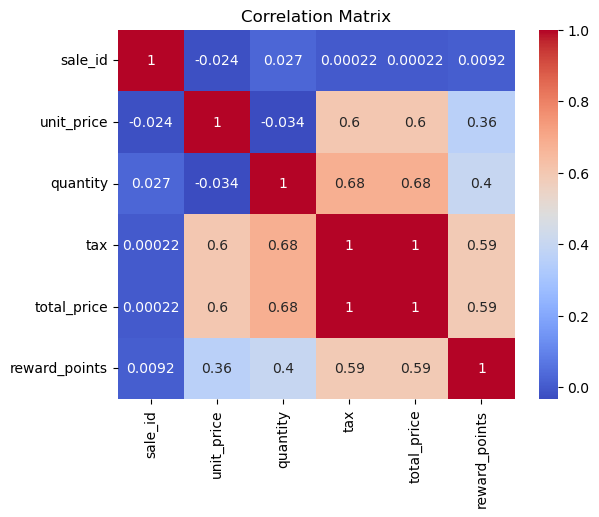

In [16]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
